# Numerical Exercise 04

Before running this notebook, you need to:
 - compile: 
   - `cmake -S . -B build -DCMAKE_BUILD_TYPE=Release`
   - `cmake --build build/ -j <NUM_OF_CORES>` 
 - execute: 
   - `./ex04.1.sh`
   - `./ex04.3.sh`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.style as style 
style.use('tableau-colorblind10')

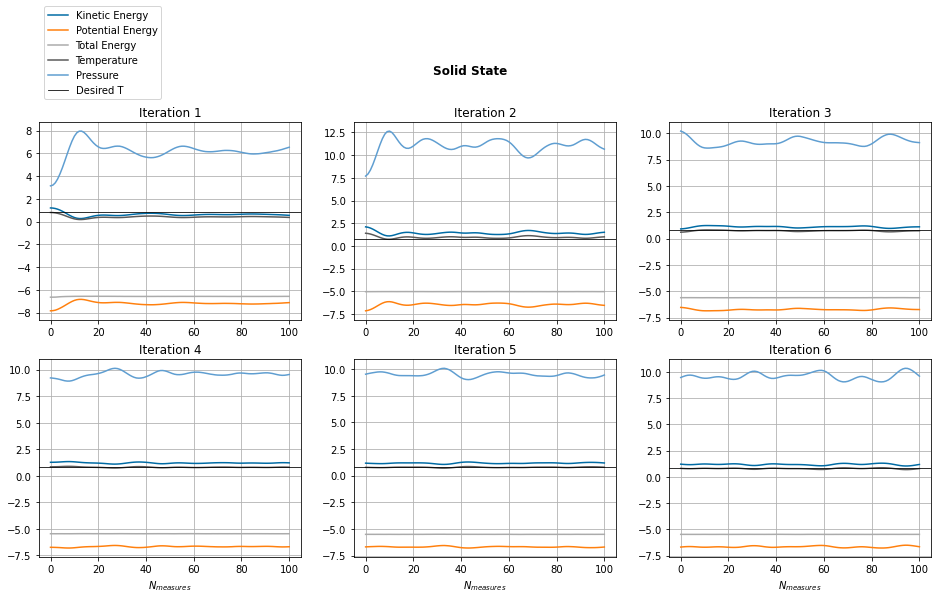

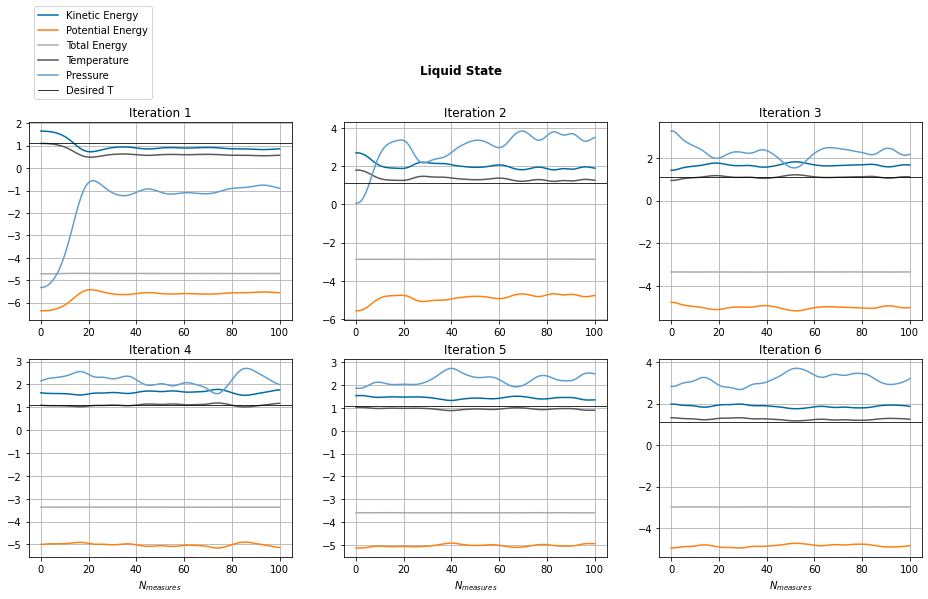

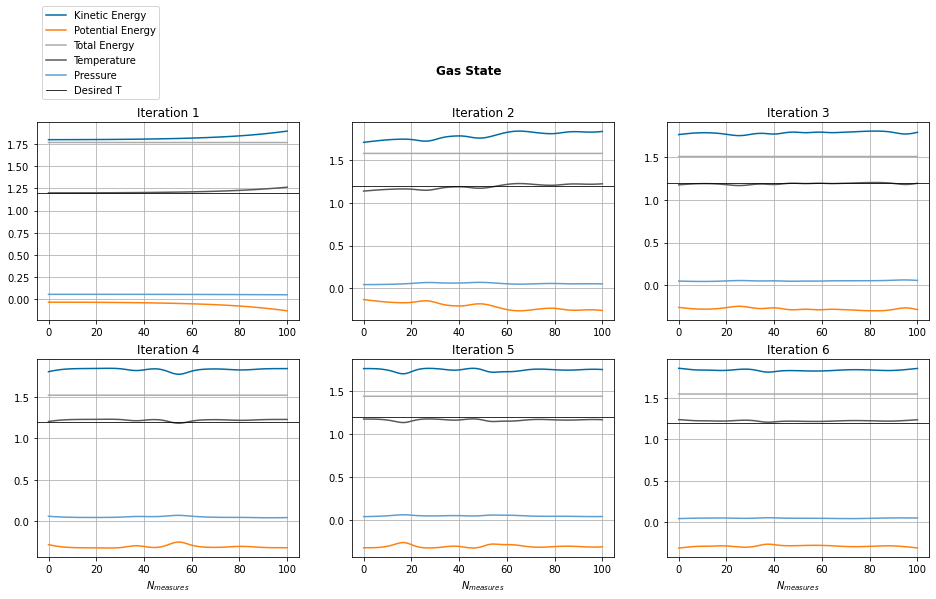

In [2]:
nG=6 #numbers of graphs (max 8)

def suptitle(state):
    if state=="solid": state="Solid"
    elif state=="liquid": state="Liquid"
    elif state=="gas": state="Gas"
    plt.suptitle(state+' State',size='large', weight='bold')
    print()

def state_equil(state,T_des):   #state is "solid", "liquid" or "gas"
    plt.figure(figsize=(16,8))
    step=1
    while step<=nG:

        ekin=np.genfromtxt('build/ex04.1/'+ state+ '/results'+str(step)+'/ekin.dat')
        epot=np.genfromtxt('build/ex04.1/'+ state+ '/results'+str(step)+'/epot.dat')
        etot=np.genfromtxt('build/ex04.1/'+ state+ '/results'+str(step)+'/etot.dat')
        temp=np.genfromtxt('build/ex04.1/'+ state+ '/results'+str(step)+'/temp.dat')
        press=np.genfromtxt('build/ex04.1/'+ state+ '/results'+str(step)+'/press.dat')
        mes=(ekin,epot,etot,temp,press)
        label=('Kinetic Energy','Potential Energy','Total Energy','Temperature','Pressure')
    
        plt.subplot(2,3,step)
        for i in range(5): plt.plot(mes[i],label=label[i])
        plt.axhline(y=T_des,color='k',linewidth=0.8,label='Desired T')
        if(step==1): plt.legend(loc='center left', bbox_to_anchor=(0, 1.35))
        if(step>3): plt.xlabel('$N_{measures}$')
        plt.title('Iteration '+str(step))
        plt.grid(True)    
        step+=1
    
    suptitle(state)
    plt.show()
    
state_equil("solid",0.8)
state_equil("liquid",1.1)
state_equil("gas",1.2)

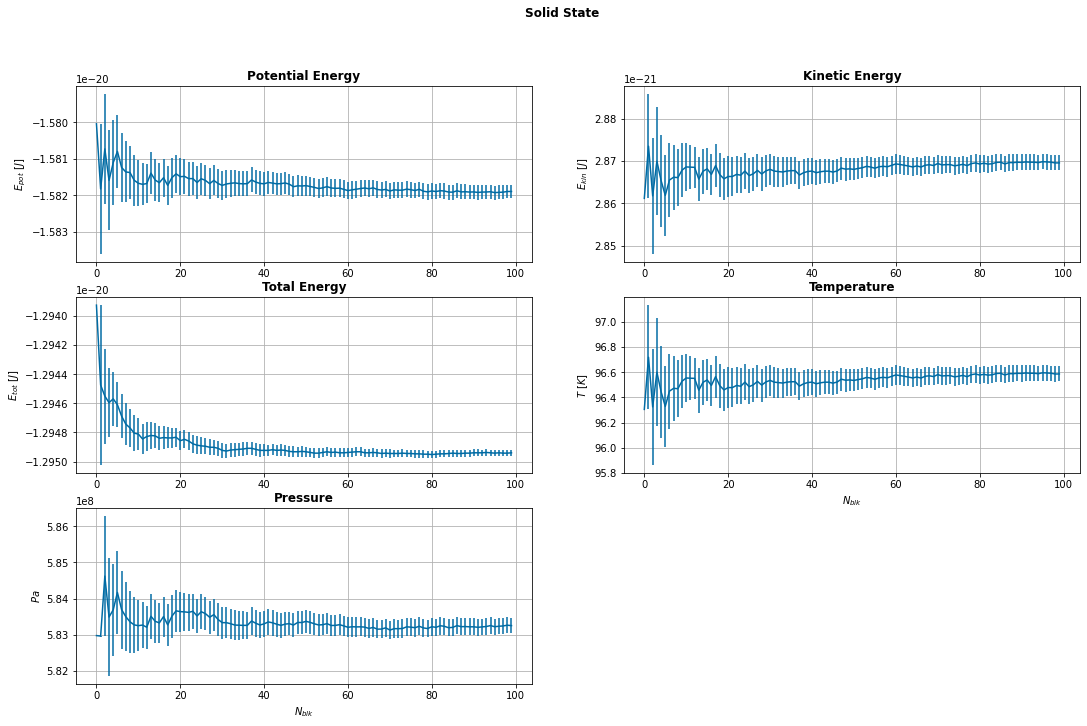

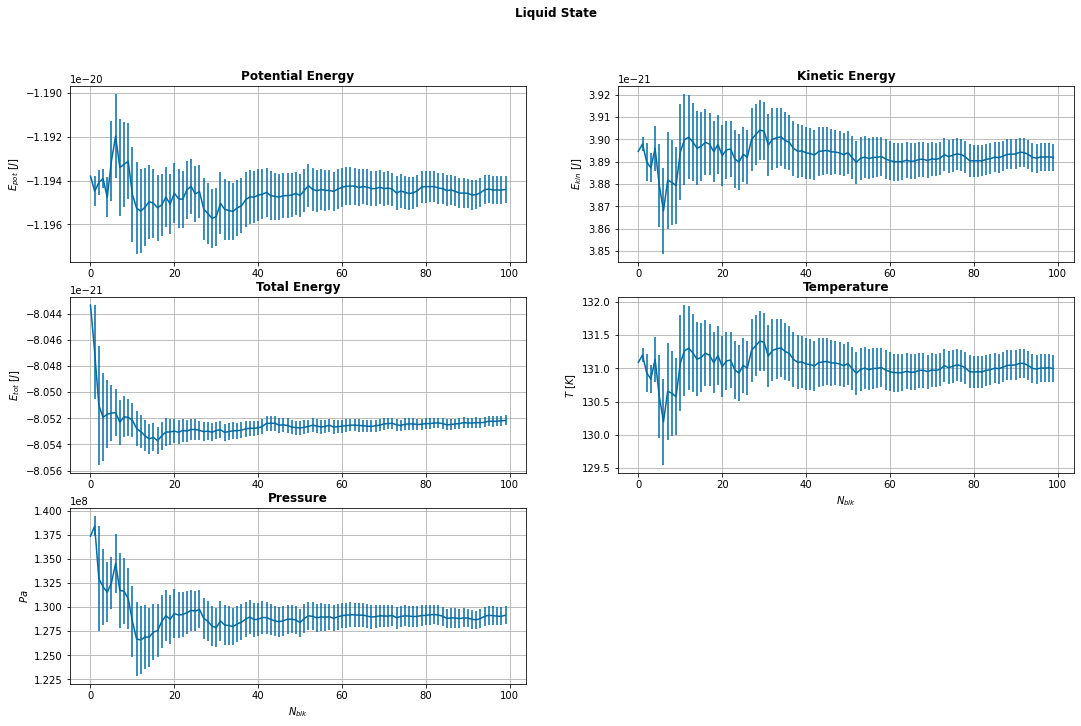

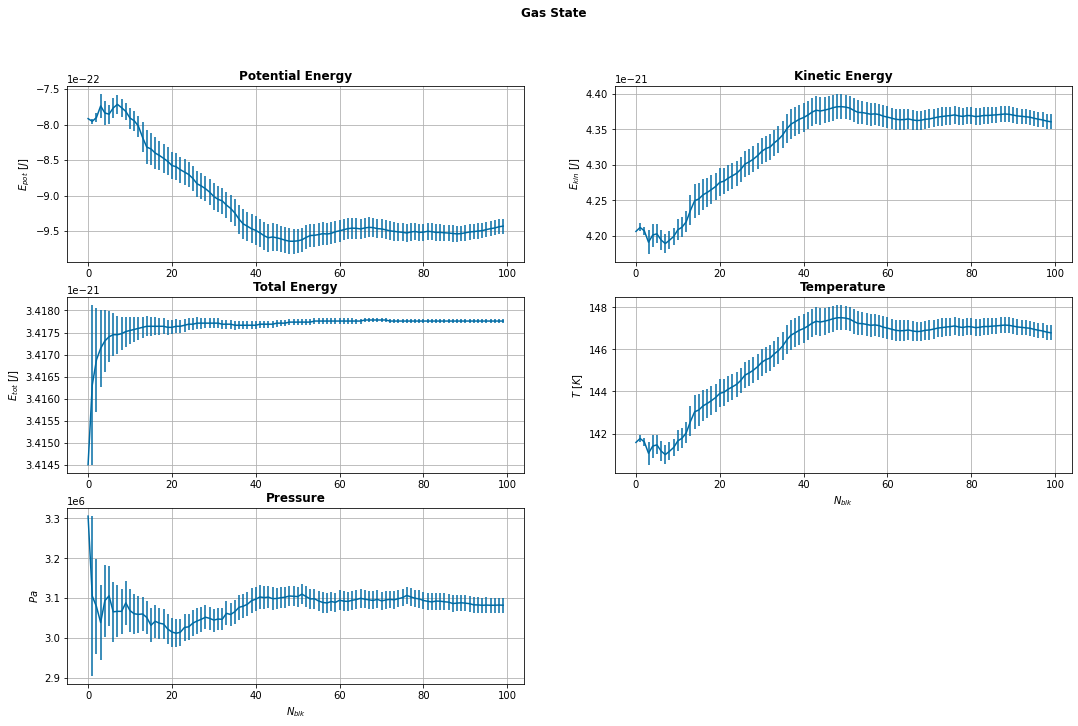

In [3]:
kB,eps_kB,sigma=1.98064852e-23,120,0.34;        #Boltzmann constant, eps/kB
eps=eps_kB*kB;
sigma_si=sigma*1E-9;

def state_meas(state):            
    
    Ekin=np.genfromtxt('build/ex04.3/'+state+'/results/ave_ekin.dat',usecols=(0,1,2),names='x,res,err')
    Epot=np.genfromtxt('build/ex04.3/'+state+'/results/ave_epot.dat',usecols=(0,1,2),names='x,res,err')
    Etot=np.genfromtxt('build/ex04.3/'+state+'/results/ave_etot.dat',usecols=(0,1,2),names='x,res,err')
    temp=np.genfromtxt('build/ex04.3/'+state+'/results/ave_temp.dat',usecols=(0,1,2),names='x,res,err')
    press=np.genfromtxt('build/ex04.3/'+state+'/results/ave_press.dat',usecols=(0,1,2),names='x,res,err')

    mes=[Epot,Ekin,Etot,temp, press]
    y_lab=['$E_{pot}$','$E_{kin}$','$E_{tot}$','$T$', '$P$']
    title=('Potential Energy','Kinetic Energy','Total Energy','Temperature','Pressure')
    #conversion in real unit, explicit in the labels
    for i in range(3): mes[i]['res']*=eps; mes[i]['err']*=eps; y_lab[i]+='$\ [J]$'
    temp['res']*=eps_kB; temp['err']*=eps_kB; y_lab[3]+='$\ [K]$'; 
    press['res']*=eps/(sigma_si**3); press['err']*=eps/(sigma_si**3); y_lab[4]='$Pa$'

    plt.figure(figsize=(18,11))
    for i in range(5):
        plt.subplot(3,2,i+1)
        plt.errorbar(mes[i]['x'],mes[i]['res'],yerr=mes[i]['err'])
        if i>2: plt.xlabel('$N_{blk}$')
        plt.ylabel(y_lab[i])
        plt.title(title[i],size='large', weight='bold')
        plt.grid(True)        
        
    suptitle(state)
    plt.show()
    
state_meas("solid")
state_meas("liquid")
state_meas("gas")